In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.stats import linregress
import statsmodels.api as smapi

In [2]:
# Mt. Sinai data location
file_dir = '/data/Ali/RadDBS-QSM/src/csv'

In [3]:
# Load patient data
os.chdir(file_dir)
df = pd.read_csv('QSM anonymus- 6.22.2023-1528.csv')

In [4]:
# Display original dataframe
df

,Unnamed: 0,PRE-OP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,POST-OP (6 MONTHS),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [5]:
# Make a copy
dfd = df.copy()
# Use descriptions as headers
header = dfd.iloc[0] 
dfd = dfd[1:] 
dfd.columns = header #set the header row
dfd

,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
5,75,na,na,62,8,2/24/2020,0,0,2,na,NaN,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [6]:
# Make a copy for motor symptoms
motor_df = dfd.copy()
motor_df = motor_df.replace('na',np.NaN)
motor_df = motor_df.replace('only Ct data ',9)
motor_df = motor_df.replace('DELETE THIS PATIENT- NO SURGERY??',np.NaN)
motor_df = motor_df.replace('DELETE?? not bilateral// only left dbs lead',np.NaN)

# Drop non-motor (III) columns
for (columnName, columnData) in dfd.iteritems():
    if 'CORNELL ID' in columnName:
        next
    elif 'OFF (pre-dbs updrs)' in columnName:
        next
    elif 'ON (pre-dbs updrs)' in columnName:
        next
    elif 'OFF meds ON stim 6mo' in columnName:
        next
    elif 'off stim on med 6mo' in columnName:
        next
    elif 'off stim off med 6mo' in columnName:
        next
    elif 'ON meds ON stim 6mo' in columnName:
        next
    elif 'pre op levadopa equivalent dose (mg)' in columnName:
        next
    elif '6 mo levadopa equivalent dose (mg)' in columnName:
        next
    else:
        motor_df.drop(columnName,axis=1,inplace=True)

In [7]:
motor_df

,CORNELL ID,OFF (pre-dbs updrs),ON (pre-dbs updrs),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo
1,67,60,41,500,500,31,29,NaN,NaN
2,9,43,12,2304,819,NaN,20,18,NaN
3,74,34,11,1200,600,NaN,17,NaN,NaN
4,84,53,13,350,150,NaN,34,NaN,NaN
5,75,62,8,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
87,52,58,27,1804,1804,19,12,NaN,NaN
88,53,77,47,575,250,NaN,19,26,NaN
89,54,63,36,1400,400,8,NaN,NaN,NaN
90,55,40,29,400,450,NaN,13,NaN,37


In [8]:
# Convert columns to numerical arrays
df_post_dbs_off_meds_on_stim = motor_df['OFF meds ON stim 6mo'].to_numpy().astype('float')
df_post_dbs_on_meds_off_stim = motor_df['off stim on med 6mo'].to_numpy().astype('float')
df_post_dbs_off_meds_off_stim = motor_df['off stim off med 6mo'].to_numpy().astype('float')
df_pre_dbs_off_meds = motor_df['OFF (pre-dbs updrs)'].to_numpy().astype('float')
df_pre_dbs_on_meds = motor_df['ON (pre-dbs updrs)'].to_numpy().astype('float')

In [9]:
# Find numerical entries only
cases = np.where(~np.isnan(df_post_dbs_off_meds_on_stim+df_pre_dbs_off_meds+df_pre_dbs_on_meds))

From Zhao et. al and Lin et. al, define medication responsivness as:

$$ \rho_{med} = \frac{u_{pre,\,off\,med}-u_{pre,\,on\,med}}{u_{pre,\,off\,med}}$$

Where $\rho_{med}$ is `pre_dbs_meds_improvement`, $u_{pre,\,off\,med}$ is `df_pre_dbs_off_meds` and $u_{pre,\,on\,med}$ is `df_pre_dbs_on_meds`

In [10]:
pre_dbs_meds_improvement = (df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases])/df_pre_dbs_off_meds[cases]

Both Zhao et. al and Liu et. al define DBS responsivness as:

$$ \rho_{stim} = \frac{u_{pre,\,off\,med}-u_{post,\,stim\,on,\,off-med}}{u_{pre,\,off\,med}}$$

Where $\rho_{stim}$ is `dbs_off_meds_improvement`, $u_{pre,\,off\,med}$ is `df_pre_dbs_off_meds` and $u_{post,\,on\,stim,\,off\,med}$ is `df_post_dbs_off_meds_on_stim`

In [11]:
dbs_off_meds_improvement = (df_pre_dbs_off_meds[cases]-df_post_dbs_off_meds_on_stim[cases])/df_pre_dbs_off_meds[cases]

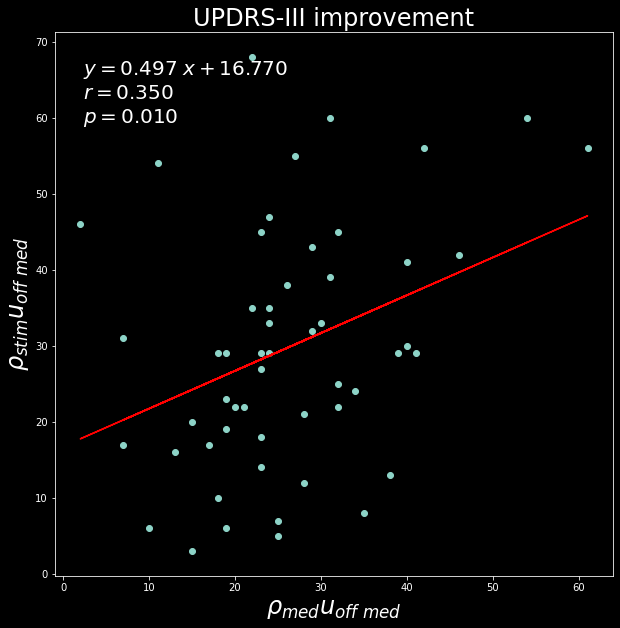

In [19]:
# Plot the data and fit like Zaidel et. al Figure 3A
lr_rho_med = linregress((df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases]),(df_pre_dbs_off_meds[cases]-df_post_dbs_off_meds_on_stim[cases]))
plt.scatter((df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases]),(df_pre_dbs_off_meds[cases]-df_post_dbs_off_meds_on_stim[cases]))
plt.plot((df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases]),(df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases])*lr_rho_med.slope+lr_rho_med.intercept,'-r')
text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=20, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel(r'$\rho_{med}u_{off \ med}$',fontsize=24)
plt.ylabel(r'$\rho_{stim}u_{off \ med}$',fontsize=24)

plt.title('UPDRS-III improvement',fontsize=24)
plt.style.use('dark_background')
plt.show;

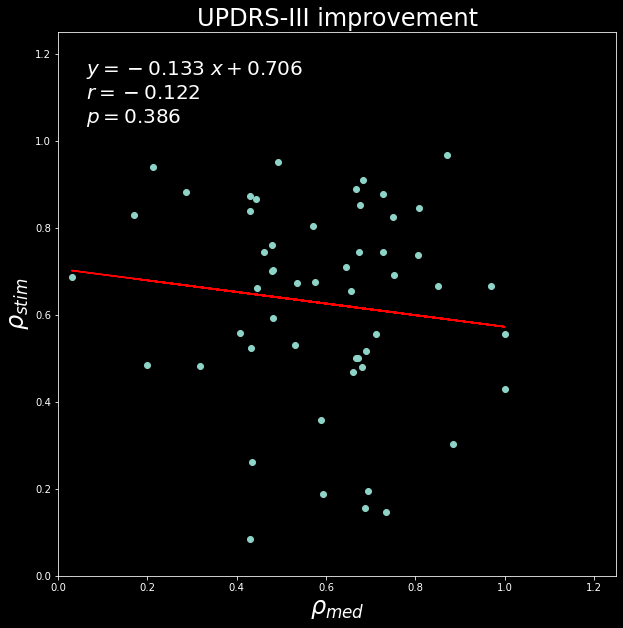

In [13]:
# Plot the data and fit like Zaidel et. al Figure 3C
lr_rho_med = linregress(pre_dbs_meds_improvement,dbs_off_meds_improvement)
plt.scatter(pre_dbs_meds_improvement,dbs_off_meds_improvement)
plt.plot(pre_dbs_meds_improvement,pre_dbs_meds_improvement*lr_rho_med.slope+lr_rho_med.intercept,'-r')
text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=20, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel(r'$\rho_{med}$',fontsize=24)
plt.ylabel(r'$\rho_{stim}$',fontsize=24)
plt.ylim([0,1.25])
plt.xlim([0,1.25])
plt.title('UPDRS-III improvement',fontsize=24)
plt.style.use('dark_background')
plt.show;

Lin et. al also defines a postoperative measure where all scores are collected after the DBS surgery:

$$ \rho_{post} = \frac{u_{post,\,off\,med,\,stim\,off}-u_{post,\,stim\,on,\,off\,med}}{u_{post,\,off\,med,\,stim\,off}}$$

Where $\rho_{post}$ is `postop_improvement`, $u_{post,\,off\,med,\,stim\,off}$ is `df_post_dbs_off_meds_off_stim` and $u_{post,\,on\,stim,\,off\,med}$ is `df_post_dbs_off_meds_on_stim`

The preoperative measure is equivalent to $\rho_{med}$.

In [14]:
ppcases = np.where(~np.isnan(df_post_dbs_off_meds_off_stim+df_post_dbs_off_meds_on_stim))

In [15]:
postop_improvement = (df_post_dbs_off_meds_off_stim[ppcases]-df_post_dbs_off_meds_on_stim[ppcases])/df_post_dbs_off_meds_off_stim[ppcases]
preop_improvement = (df_pre_dbs_off_meds[ppcases]-df_pre_dbs_on_meds[ppcases])/df_pre_dbs_off_meds[ppcases]
lr_prepost = linregress(preop_improvement,postop_improvement)

In [16]:
l_dopa_pre = motor_df['pre op levadopa equivalent dose (mg)'].to_numpy().astype('float')
l_dopa_post_6mo = motor_df['6 mo levadopa equivalent dose (mg)'].to_numpy().astype('float')

In [17]:
print('L-dopa pre-operative dose (mg):', np.mean(l_dopa_pre[ppcases]),'+',np.std(l_dopa_pre[ppcases]))
print('L-dopa post-operative dose (mg):', np.mean(l_dopa_post_6mo[ppcases]),'+',np.std(l_dopa_post_6mo[ppcases]))

L-dopa pre-operative dose (mg): 1115.4857142857143 + 669.2218795598607
L-dopa post-operative dose (mg): 623.8714285714286 + 584.1712205320964


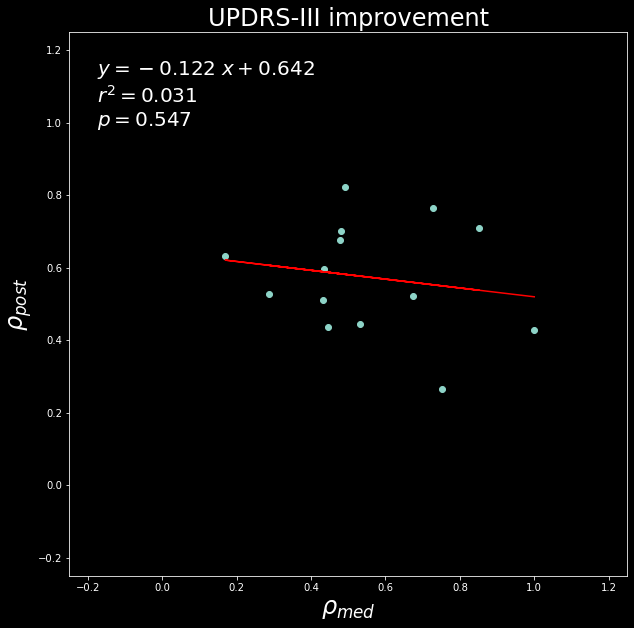

In [18]:
# Plot the data and fit like Lin et. al Figure 1B
plt.scatter(preop_improvement,postop_improvement)
plt.plot(preop_improvement,preop_improvement*lr_prepost.slope+lr_prepost.intercept,'-r')
text = f"$y={lr_prepost.slope:0.3f}\;x{lr_prepost.intercept:+0.3f}$\n$r^2 = {lr_prepost.rvalue**2:0.3f}$\n$p = {lr_prepost.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=20, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim([-0.25,1.25])
plt.xlim([-0.25,1.25])
plt.xlabel(r'$\rho_{med}$',fontsize=24)
plt.ylabel(r'$\rho_{post}$',fontsize=24)
plt.title('UPDRS-III improvement',fontsize=24)
plt.style.use('dark_background')
plt.show;

<b>References</b>
$$$$
A. Zaidel, H. Bergman, Y. Ritovand Z. I. Md, “Levodopa and subthalamic deep brain stimulation responses are not congruent”, Movement Disorders, vol. 25, no. 14, pp. 2379–2386, 2010, doi: 10.1002/mds.23294. 
$$$$
W. Zhao, “Relationship Between Iron Distribution in Deep Gray Matter Nuclei Measured by Quantitative Susceptibility Mapping and Motor Outcome After Deep Brain Stimulation in Patients With Parkinson's Disease”, Journal of Magnetic Resonance Imaging, 2023, doi: 10.1002/jmri.28574.
$$$$
Liu Y, Xiao B, Zhang C, et al. Predicting Motor Outcome of Subthalamic Nucleus Deep Brain Stimulation for Parkinson's Disease Using Quantitative Susceptibility Mapping and Radiomics: A Pilot Study. Front Neurosci. 2021;15:731109. Published 2021 Sep 7. doi:10.3389/fnins.2021.731109
$$$$
Lin Z, Zhang X, Wang L, Zhang Y, Zhou H, Sun Q, Sun B, Huang P, Li D. Revisiting the L-Dopa Response as a Predictor of Motor Outcomes After Deep Brain Stimulation in Parkinson's Disease. Front Hum Neurosci. 2021 Feb 4;15:604433. doi: 10.3389/fnhum.2021.604433. PMID: 33613209; PMCID: PMC7889513.